<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Rename-Columns" data-toc-modified-id="Rename-Columns-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Rename Columns</a></span></li><li><span><a href="#Convert-string-columns-to-numeric" data-toc-modified-id="Convert-string-columns-to-numeric-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Convert string columns to numeric</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Non-Visual" data-toc-modified-id="Non-Visual-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Non-Visual</a></span><ul class="toc-item"><li><span><a href="#General" data-toc-modified-id="General-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>General</a></span></li><li><span><a href="#Count-of-Unique-Numeric-Values" data-toc-modified-id="Count-of-Unique-Numeric-Values-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Count of Unique Numeric Values</a></span></li><li><span><a href="#Unique-Non-Numerical-Values" data-toc-modified-id="Unique-Non-Numerical-Values-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Unique Non-Numerical Values</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Numeric-Features" data-toc-modified-id="Numeric-Features-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Numeric Features</a></span><ul class="toc-item"><li><span><a href="#Tenure" data-toc-modified-id="Tenure-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Tenure</a></span></li><li><span><a href="#Monthly-Charges" data-toc-modified-id="Monthly-Charges-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Monthly Charges</a></span></li><li><span><a href="#Total-Charges" data-toc-modified-id="Total-Charges-3.2.1.3"><span class="toc-item-num">3.2.1.3&nbsp;&nbsp;</span>Total Charges</a></span></li></ul></li><li><span><a href="#Non-Numeric-Features" data-toc-modified-id="Non-Numeric-Features-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Non-Numeric Features</a></span></li></ul></li><li><span><a href="#Feature-Relationships" data-toc-modified-id="Feature-Relationships-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Relationships</a></span><ul class="toc-item"><li><span><a href="#Premature-Preprocessing" data-toc-modified-id="Premature-Preprocessing-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Premature Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Remove-redundant-information" data-toc-modified-id="Remove-redundant-information-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Remove redundant information</a></span></li></ul></li><li><span><a href="#Correlation-Heatmaps" data-toc-modified-id="Correlation-Heatmaps-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Correlation Heatmaps</a></span><ul class="toc-item"><li><span><a href="#All-Features" data-toc-modified-id="All-Features-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>All Features</a></span></li><li><span><a href="#Target-Feature" data-toc-modified-id="Target-Feature-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Target Feature</a></span></li></ul></li><li><span><a href="#Target-Feature-vs.-High-Correlation-Features" data-toc-modified-id="Target-Feature-vs.-High-Correlation-Features-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Target Feature vs. High Correlation Features</a></span></li></ul></li></ul></li></ul></div>

**Note: Having nbextension "Table of Contents" *enabled* is very helpful for knowing where you are in the flow of this notebook**

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Wrangling

## Import Data

In [2]:
data = pd.read_csv('Data/Telecom_Customer_Churn.csv')

## Data Cleaning

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Rename Columns

In [5]:
# Capitalize columns that aren't capitalized
data.rename(columns={'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'}, inplace=True)

### Convert string columns to numeric

**Total Charges**

In [6]:
# View the rows who keep the column from converting to numeric's values
data['TotalCharges'][pd.to_numeric(data['TotalCharges'], errors='coerce').isna()]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

They're all spaces! Let's just convert them to 0s

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

In [8]:
data['TotalCharges'].dtype

dtype('float64')

# Exploratory Data Analysis

## Non-Visual

### General

In [9]:
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Statistically describe numerical features
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Count of Unique Numeric Values

In [11]:
data.nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Unique Non-Numerical Values

In [12]:
from collections import defaultdict

Find and save all unique non-numerical values to a DataFrame

In [13]:
def feature_unique_values_to_df(df):
    '''Receive a DataFrame, find columns with 10 or less unique values, and return a DataFrame that shows the unique values'''
    
    # Initiate an empty default-dictionary
    unique_values = defaultdict(list)

    # Find the columns with fewer than 10 unique values
    categories = df.loc[:, df.nunique() <= 10].columns

    # Save each of those column's unique values in a dictionary
    max_unique = 0
    for cat in categories:
        unique = df[cat].unique().tolist()
        len_unique = len(unique)
        unique_values[cat] = unique
        max_unique = max(max_unique, len_unique)

    # Fill dictionary values with - to match the length of the column with the most unique features
    for key, val in unique_values.items():
        if len(val) < max_unique:
            diff = max_unique - len(val)
            unique_values[key].extend(['-'] * diff)

    # Convert the unique values dictionary to a DataFrame and return it
    return pd.DataFrame(unique_values).T

In [14]:
# Show the unique values per feature
unique_values = feature_unique_values_to_df(data)

unique_values

,0,1,2,3
Gender,Female,Male,-,-
SeniorCitizen,0,1,-,-
Partner,Yes,No,-,-
Dependents,No,Yes,-,-
PhoneService,No,Yes,-,-
MultipleLines,No phone service,No,Yes,-
InternetService,DSL,Fiber optic,No,-
OnlineSecurity,No,Yes,No internet service,-
OnlineBackup,Yes,No,No internet service,-
DeviceProtection,No,Yes,No internet service,-


## Visualizations

### Numeric Features

In [15]:
def plot_numeric_feature(feature_data, label_name):
    '''Plot a given feature using a ECDF and histogram on the same plot.
    Label name is the y-label for the boxplot and x-label for the histogram'''
    
    # Set plot data
    plot_data = feature_data

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(15,6))

    # First plot
    sns.ecdfplot(data=plot_data, stat='count', ax=ax[0])
    ax[0].set_title('ECDF')
    ax[0].set_xlabel(label_name)

    # Second plot
    sns.histplot(x=plot_data, ax=ax[1])
    ax[1].set_title('Histogram')
    ax[1].set_xlabel(label_name)
    
    fig.tight_layout();

#### Tenure

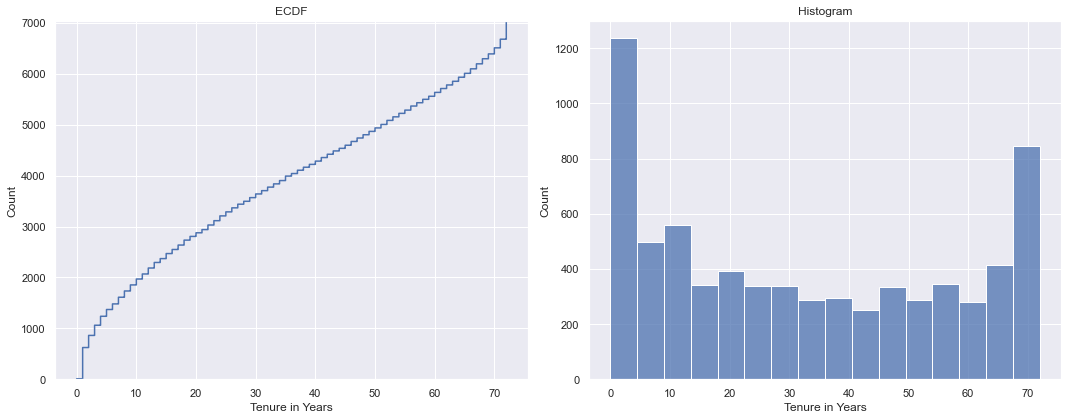

In [16]:
plot_numeric_feature(data['Tenure'], 'Tenure in Years')

#### Monthly Charges

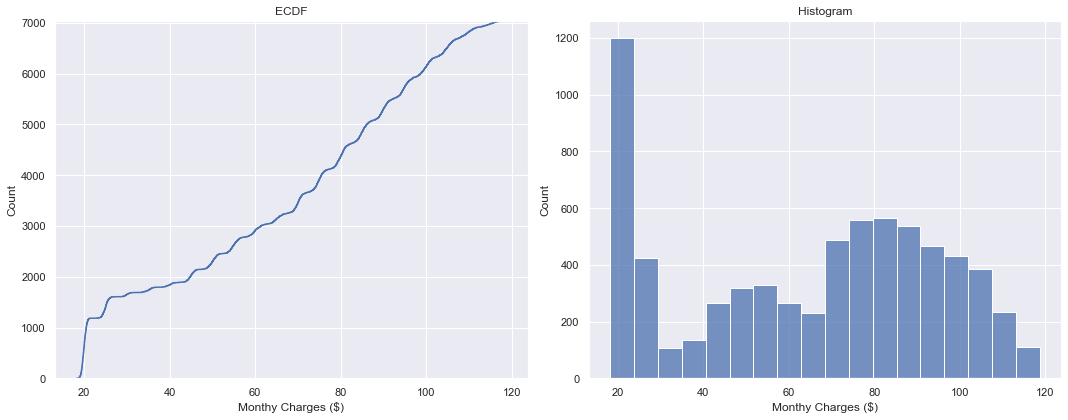

In [17]:
plot_numeric_feature(data['MonthlyCharges'], 'Monthy Charges ($)')

#### Total Charges

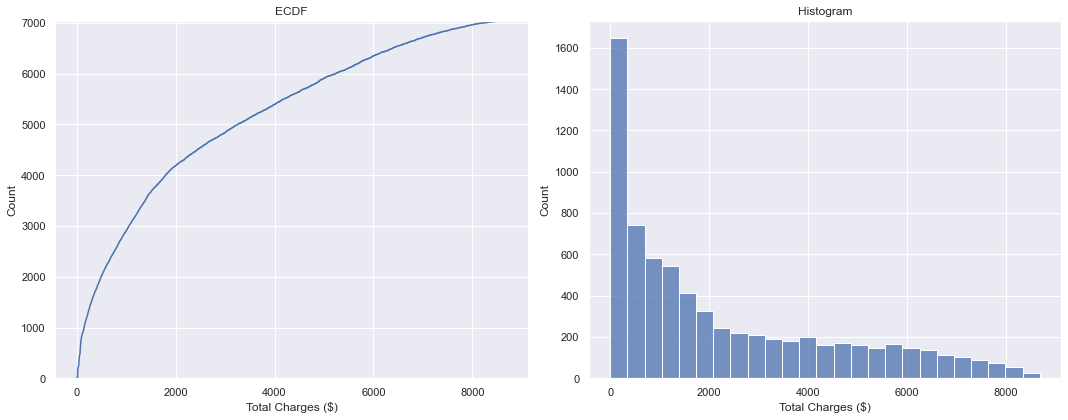

In [18]:
plot_numeric_feature(data['TotalCharges'], 'Total Charges ($)')

### Non-Numeric Features

In [97]:
def subplot_categorical_features(data, columns=4, exclude_features=False, figsize=None):
    '''
    
    Plot all categorical features as barplots on one Matplotlib subplot.
    
    Parameters
    ----------
    
    data : A Pandas DataFrame.
    
    columns : An integer for the number of columns in the plot.
    
    exclude_features : Iterable which contains the features to not use, and figsize to set the figsize of the plot.
    
    figsize : Iterable with two values which each represent the desired length and width of the plot.
    
    '''
    from math import ceil
    
    # Create a list for each feature of dtype "object" in data
    if exclude_features:
        categoricals = [col for col, dtype in zip(data.columns, data.dtypes) if dtype == 'object' and col not in (exclude_features)]
    else:
        categoricals = [col for col, dtype in zip(data.columns, data.dtypes) if dtype == 'object']
    
    # Store the number of features in data
    num_feat = len(categoricals)
    
    # Calculate and store number of necessary rows (with 4 columns) based on number of categorical columns
    row_num = ceil(num_feat/columns)
    
    # If no figsize is passed, set an appropriate figsize
    if not figsize:
        figsize = (16, row_num * 3)
    
    # Create a Matplotlib subplot object with the appropriate number of rows and columns
    fig, ax = plt.subplots(row_num, columns, figsize=figsize)

    # Plot each column
    for i, feature in enumerate(categoricals):
        sns.countplot(y=data[feature], ax=ax[i//columns,i%columns])
        ax[i//columns,i%columns].set_title(feature)

    # Adjust and show the plot
    plt.tight_layout()
    plt.show()

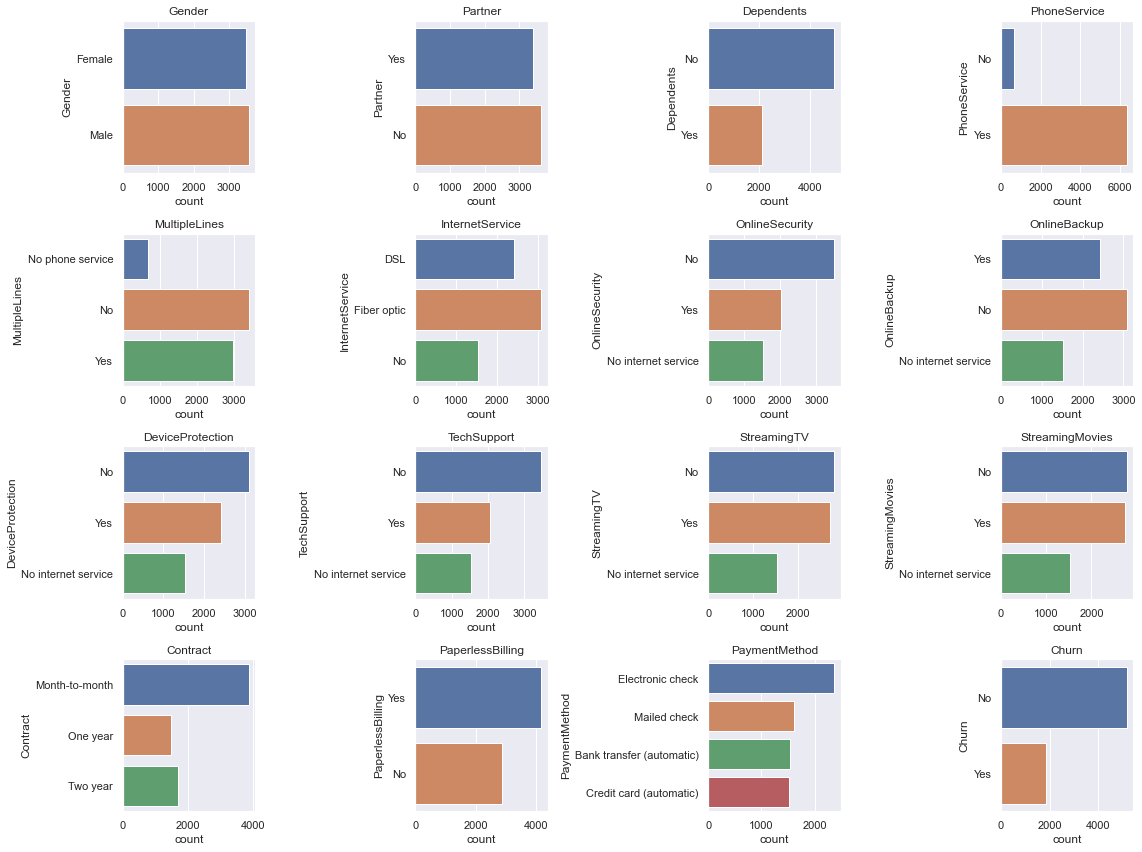

In [98]:
subplot_categorical_features(data, columns=4, exclude_features='CustomerID')

## Feature Relationships

### Premature Preprocessing

In [21]:
# Get dummies for categorical features
dummies = pd.get_dummies(data.drop(['CustomerID','Tenure','MonthlyCharges','TotalCharges'], axis=1), drop_first=False)

# Create a new DataFrame that includes the dummy features
data_dummies = data[['CustomerID','Tenure','MonthlyCharges','TotalCharges']].join(dummies)

#### Remove redundant information

Here I'll remove newly created dummy features which each contain the same information. Only one of these columns is necessary.

In [22]:
from re import search

In [23]:
# Find and save columns which each represent no internet service
drop_cols = [col for col in data_dummies.columns if search('No internet service', col)]

# Remove those columns
data_dummies.drop(drop_cols, axis=1, inplace=True)

### Correlation Heatmaps

#### All Features

In [27]:
# Define a function to generate a features correlations heatmap
def gen_corr_heatmap(dataframe, title=None, mask=False, annot=False, save=False):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)

    if mask == True:
        mask = np.zeros_like(dataframe.corr())
        mask[np.triu_indices_from(mask)] = True

    with sns.axes_style('white'):
        sns.heatmap(dataframe.corr(), vmin=-1, vmax=1,
                    mask=mask, center=0, annot=annot, cmap='bwr')

    if title:
        plt.title(f'\n{title}\n', fontsize=18)

    if save:
        filepath = title + '.png'
        save_and_show_plot(filepath)

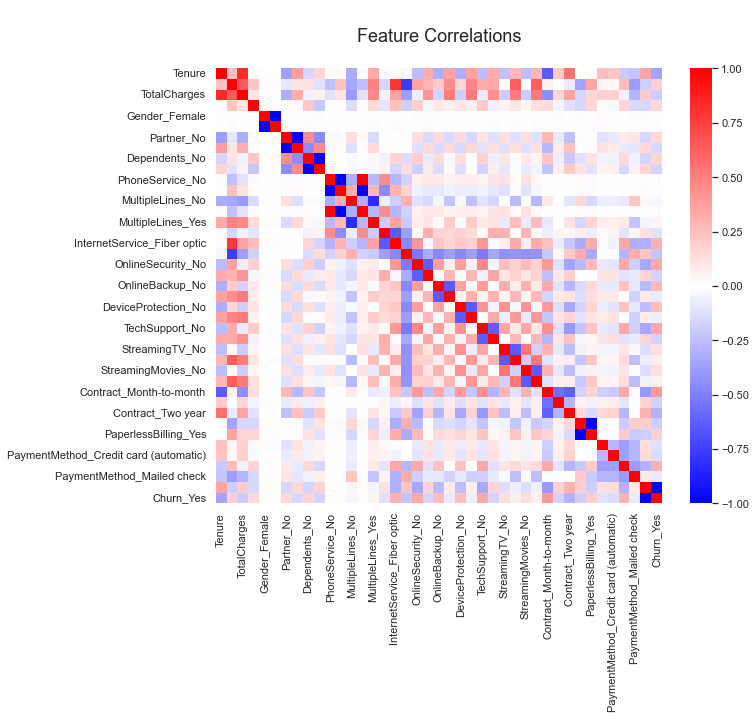

In [28]:
gen_corr_heatmap(data_dummies, 'Feature Correlations')

#### Target Feature

In [25]:
# Define a function to generate a correlation heatmap between the target feature and other features
def gen_corr_to_target(dataframe, target, title=None, annot=False, save=None):
    plt.figure(figsize=(5, 10))
    sns.set(font_scale=1)

    sns.heatmap(dataframe.corr()[[target]].sort_values(target, ascending=False)[1:], vmin=-1, vmax=1,
                center=0, annot=annot, cmap='bwr')

    if title:
        plt.title(f'\n{title}\n', fontsize=18)
        
    if save:
        filepath = title + '.png'
        save_and_show_plot(filepath)

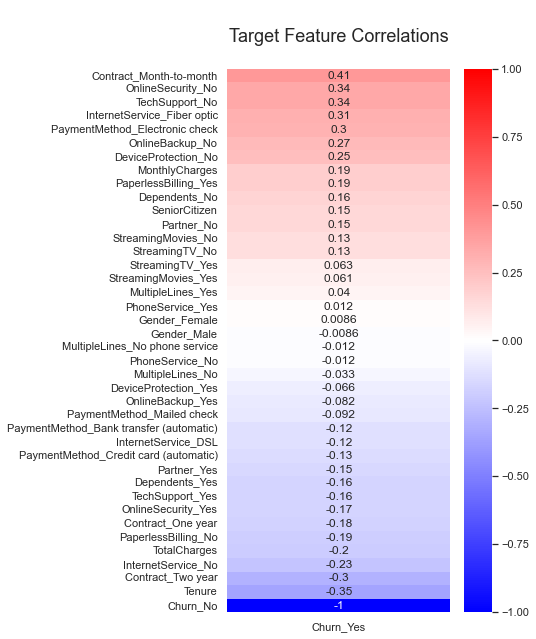

In [26]:
gen_corr_to_target(data_dummies, 'Churn_Yes', 'Target Feature Correlations', annot=True)

### Target Feature vs. High Correlation Features

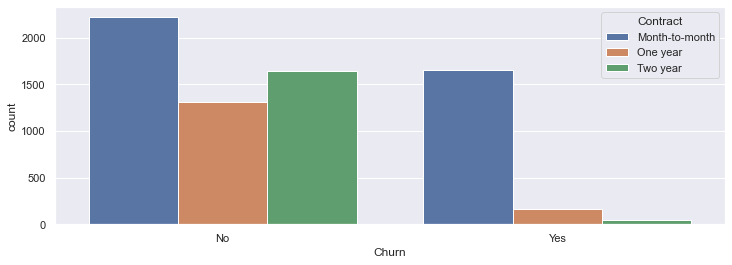

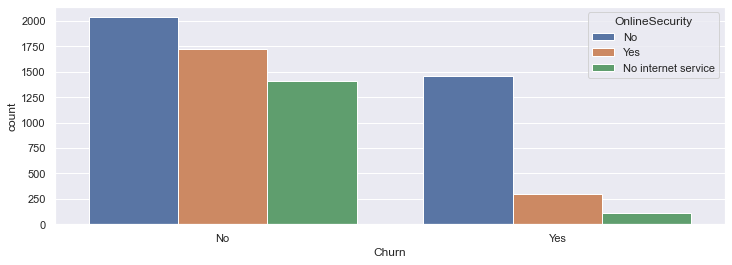

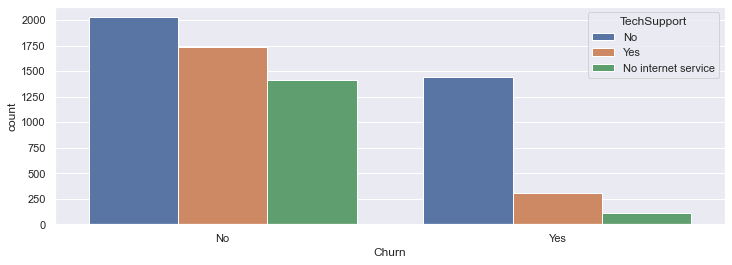

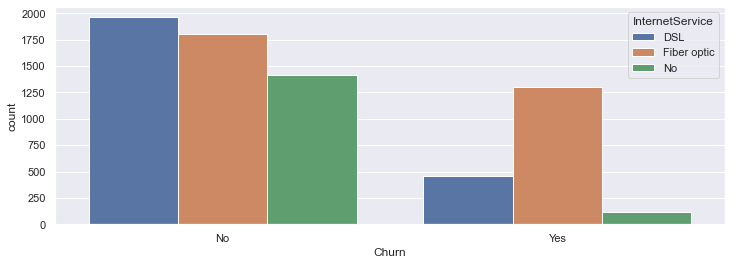

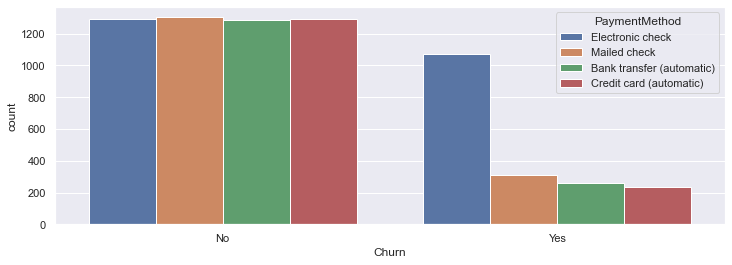

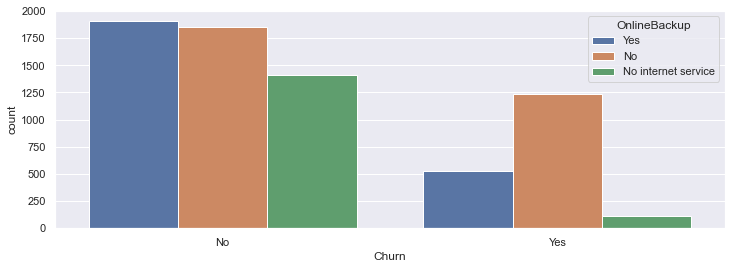

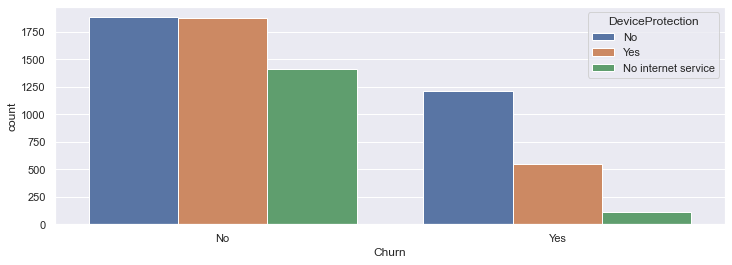

In [130]:
for feature in ['Contract','OnlineSecurity','TechSupport','InternetService','PaymentMethod','OnlineBackup','DeviceProtection']:
    plt.figure(figsize=(12,4))
    sns.countplot(data=data, x='Churn', hue=feature)
    plt.show()